
# ¿Qué es la Regresión lineal?
La regresión lineal es un algortimo de aprendizaje supervisado que se utiliza en Machine Learning y en estadística. En su versión mpas sencilla, lo que haremos es "dibujar una recta" que nos indicará la tendencia de un conjunto de datos continuos (si fueran discretos, utilizaremos Regresión Logistica) En estadística, regresión lineal es una aproximación para moldear la relación entre una variable escalar dependiente "y" y una o más variables explicativas nombradas con "X".
Recordemos rápidamente la fórmula de la recta. Y = mx +b
## The development in Pizza prices in Denmark from 2009 to 2018


Aqui vemos un ejemplo donde vemos datos recabados sobre los precos de las pizzas en Dinamarca (Los puntos en rojo) y I línea negra es la tendencia. Esa es la línea de regresión que buscamos que el algoritmo aprenda y calcule sólo.
## Ejercicio práctico
En este ejemplo cargaremos un archivo .csv de entrada obtenido por webscraping que contine diversas URLa a artículos sobre Machine Learning de algunos sitios muy importantes como Techcrunch o KDnuggests y como características de entrdas las columnas tendremos:
- Title: Título del Artículo
- url: ruta al artículo
- #de Links: Los enlaces externos qeu contiene.
- #of comments: Cantidad de comentarios.
- Imges videos: suma de imagenes (o videos).
- Elapsed days: La cantidad de días transcurridos (al momento de crear el archivo)
- #Shares: Nuestra columna de salida que será la "cantidad de veces que se compartió el artículo"
A partir de las características de un artículo de machine learning intentaremos predecir, cuantas veces será compartido en REdes Sociales. Haremos una primera predicción de regresión lineal simple con una sola variable predictoria para poder graficar en 2 dimensiones (ejex XyY) y luego un ejemplo de regresión Lineall Múltiple, en la que utilizaremos 3 dimensiones (X,Y,Z) y predicciones.
## Requerimientos para hacer el ejercicio.

PAra realizar este ejercicio, crearemos una Jupyter notebook como código Python y la librería SKLearn muy utilizada en Data Science.
# Predecir cuántas veces será compratido un artículo de MAchine Learning. 
## Regresión lineal simple en Python (con 1 variable)

In [3]:
# Importamos las bibliotecas necesarias 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
plt.rcParams['figure.figsize']=[16,9]
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [4]:

# leeamos el archiv csv y lo cargamos como un dataset de Pandas. Y vemos us tamaño 
data = pd.read_csv("articulos_ml.csv")
#Vemos cuantas dimensiones y registros que contiene
data.shape

(161, 8)

In [5]:
#
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [18]:

# Ahora veamos algunos estadísticas de nuestros datos
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Aqui vemos que la media de palabras en los artículos es de 1808. El artículo más corto tiene 250 palabras y el más extenso 8401. INtentaremos ver con nuestra relación lineal, si hay una correlación entre la cantidad de palabras del texto y la cantidad de Share obtenidos.


Hacemos una visualización en genereal de los datos de entrada:


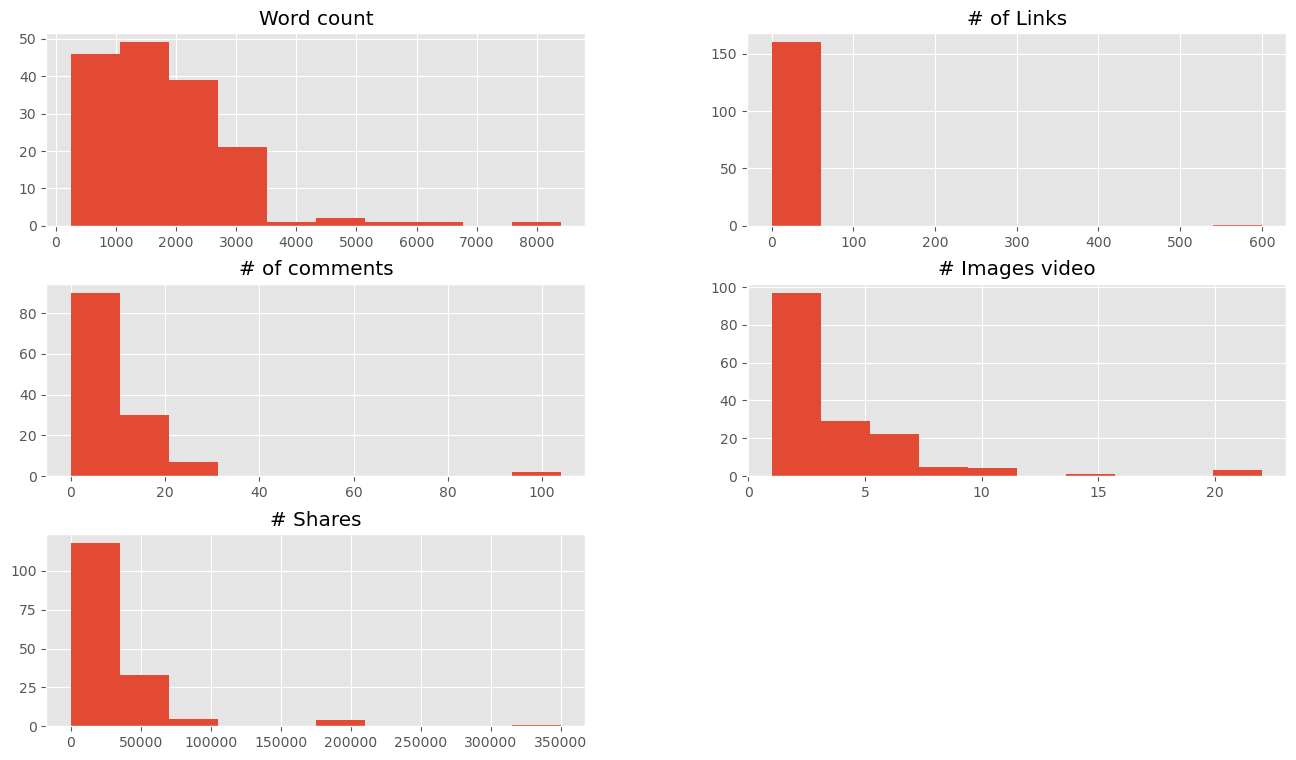

In [9]:

# Visualizamos rápidamente las características de entrada 
data.drop(['Title', 'url', 'Elapsed days'], axis=1).hist() 
plt.show()


En está gráfica vemos entre qué valores se concentran la mayoria de registros. Va mos a filtar los datos de cantidad de palabras para quedarnos con los registros con menos de 3500 palabras y también con los que tengan Cantidad de compartidos menos a 80000. Los gráficos pintando en azul los puntpos con menos de 1808 palabras (la media) y en naranja los que tengan más.

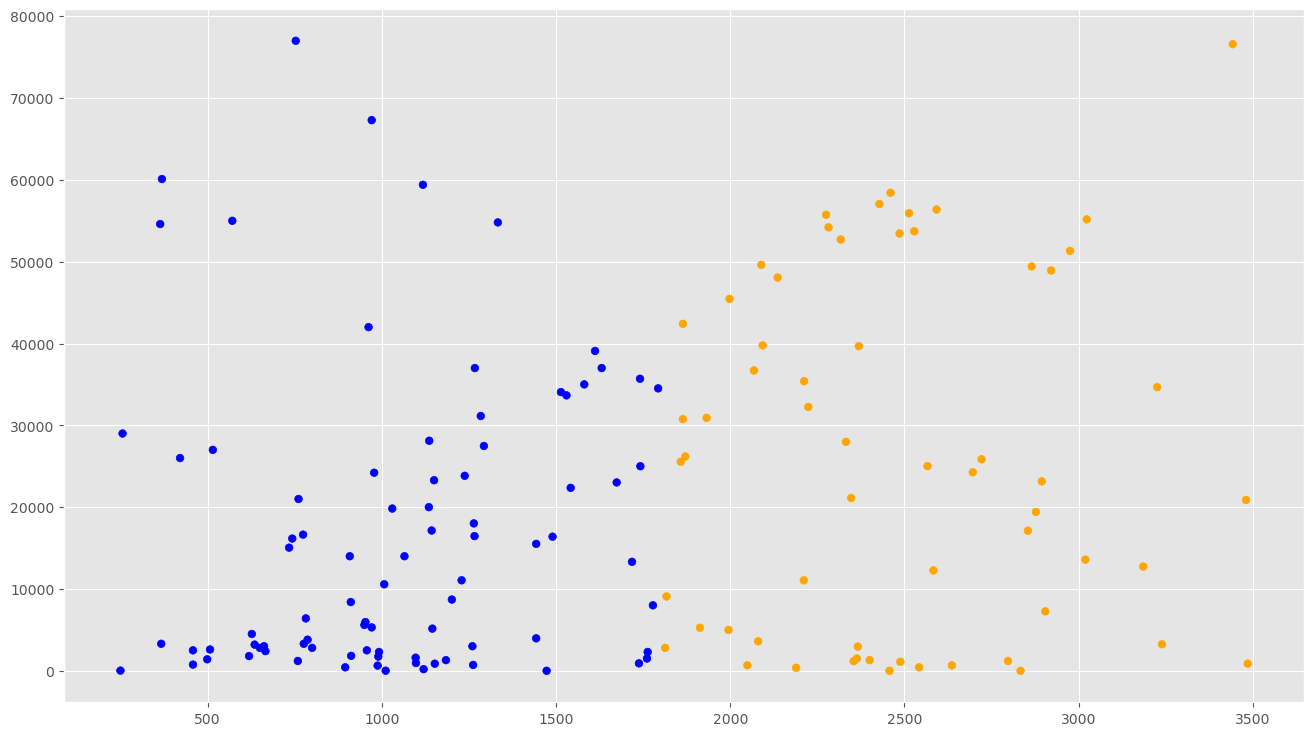

In [11]:
# Vamos a recortar los datos en la zona donde se concentran más los puntos 
# esto es en el eje X: entre 0 y 3500
# y el eje Y: entre 0 y 80000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

colores = ['orange', 'blue']
tamanios = [30, 60]
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar = []
for index, row in filtered_data.iterrows():
    if row['Word count'] > 1808:
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()


In [31]:

# Vemos como cambian los valores una vez filtraods
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000



# Regresión Lineal con Python y SKLearn
Vamos a crear nuestros datos de entrada por rl momentosolo Word Count y como etiquetas los # Shares. creamos el objeto Linear Regression y lo hacemos "encajar" (entrenar) con el mpetodo fit(). Finalmente imprimimos los coeficientes y puntajes obtenidos.

In [13]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y 
dataX = filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

# Creamos el objeto de Regresión Lineal 
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo 
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (En este caso, al ser 2D) 
y_pred = regr.predict(X_train)

# Veamos los coeficientes obtenidos, En nuestro caso, serán la tangente 
print('Coeficiente: \n', regr.coef_)

# Este es el valor donde corta el eje Y (en x=0)
print('Independent term: \n', regr.intercept_)

# Error cuadrado medio
print("Error cuadrado medio: %.2f" % mean_squared_error(y_train, y_pred))

# Puntaje de Varianza: El mejor puntaje es 1.0
print('Varianza: %.2f' % r2_score(y_train, y_pred))


Coeficiente: 
 [5.69765366]
Independent term: 
 11200.303223074163
Error cuadrado medio: 372888728.34
Varianza: 0.06



De la ecuación de la recta y=mx+b nuetsra pendiente "m" es el coeficiente 5.69 y el termino independiente "b" es 11200. Tenemos un Error Cuadratico médio enorme, por lo que en realidad este modelo no será muy bueno. Pero nuestro modelo esta aprendiendo a usarlo, que es lo que no importa ahora, Esto también se ve reflejado en el puntaje de Varianza qeu deberían ser cercano a 1.0.

# Visualizamos la recta que obtuvimos

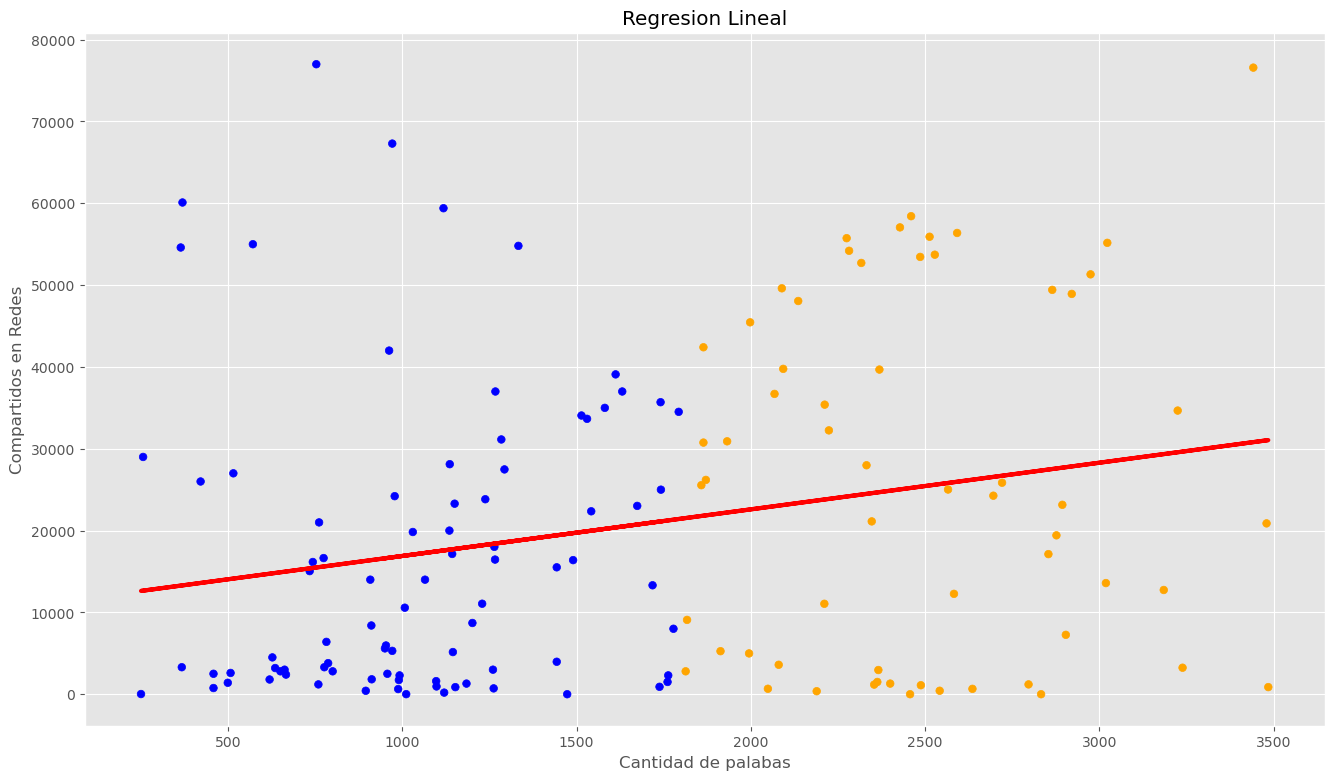

In [15]:

plt.scatter (X_train[:,0], y_train, c=asignar, s=tamanios[0]) 
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de palabas')
plt.ylabel('Compartidos en Redes')
plt.title('Regresion Lineal')
plt.show()

Ingrese la cantidad de palabras para estimar los compartidos:  3000


Para una cantidad de palabras de 3000.0, el número estimado de compartidos es: 28293.26


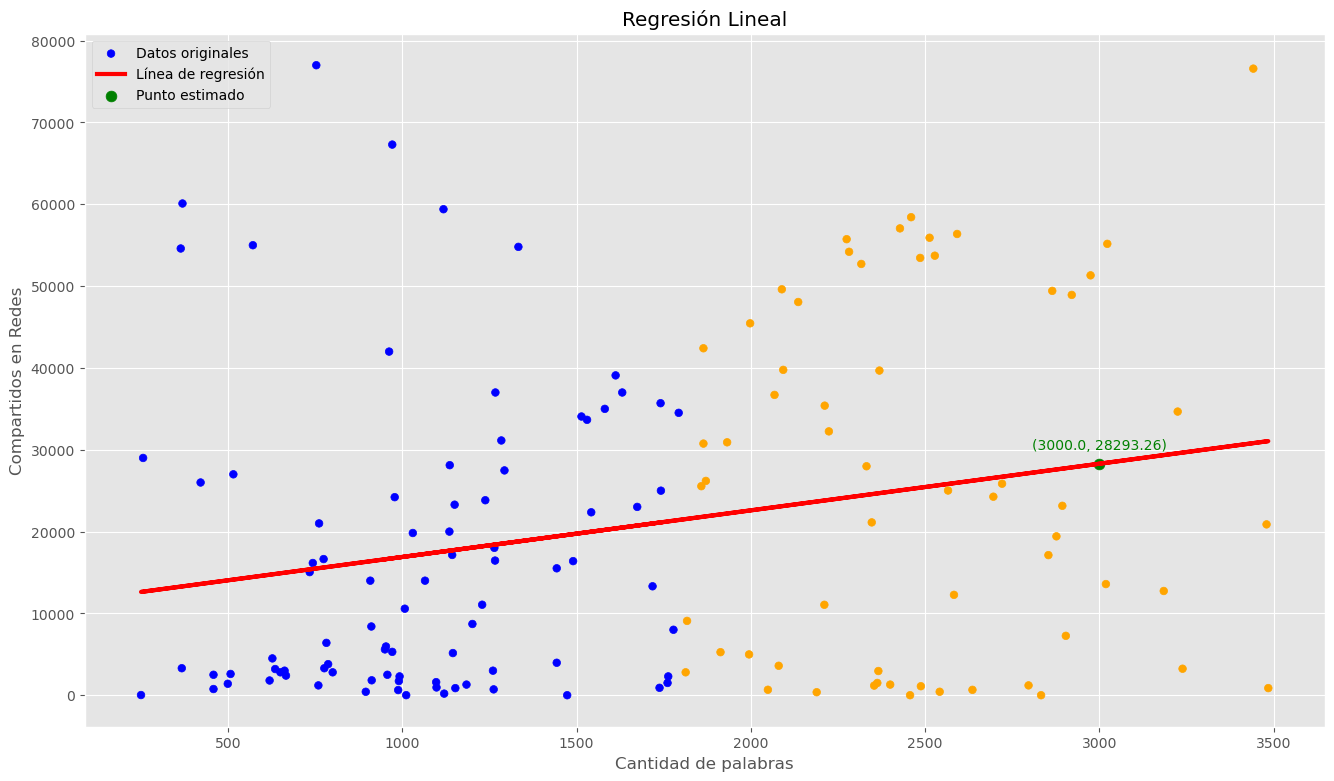

In [23]:
# Pedimos al usuario ingresar un número por teclado
entrada_usuario = float(input("Ingrese la cantidad de palabras para estimar los compartidos: "))

# Calculamos la ubicación aproximada en la regresión lineal
prediccion = regr.coef_[0] * entrada_usuario + regr.intercept_
print(f"Para una cantidad de palabras de {entrada_usuario}, el número estimado de compartidos es: {prediccion:.2f}")

# Graficamos los datos originales y la línea de regresión
plt.scatter(X_train[:, 0], y_train, c=asignar, s=tamanios[0], label="Datos originales")
plt.plot(X_train[:, 0], y_pred, color='red', linewidth=3, label="Línea de regresión")

# Agregamos el punto ingresado por el usuario
plt.scatter(entrada_usuario, prediccion, color='green', s=tamanios[1], label='Punto estimado')
plt.annotate(f'({entrada_usuario}, {prediccion:.2f})', 
             (entrada_usuario, prediccion), 
             textcoords="offset points", 
             xytext=(0,10), 
             ha='center', 
             color='green')

# Configuramos las etiquetas y leyenda
plt.xlabel('Cantidad de palabras')
plt.ylabel('Compartidos en Redes')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

